<a href="https://colab.research.google.com/github/annabelle154/skills-introduction-to-github1/blob/main/CNN_gait_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gait analysis with Convolutional Neural Networks

CNNs have been used increasingly to analyse time series data by conversion to image array format. In this code we explore the use of a CNN architecture for identity recognition from raw IMU data.  Transfer learning with the RESNET18 model is used due to the limited dataset size - further work would develop a CNN model from scratch for training with other datasets/collected data. This code illustrates a classification solution (prediction of patient ID from raw gait data) - other notebooks use regression to estimate key parameters including stride time.

Dataset used is the GSTRIDE database to extract features from gait data (details below).

Conclusion = very high accuracy for classification on the training set (99%+ after 10 epochs) - indicating patterns detected in raw IMU data enable patient identification. Model does not generalise well resulting in low accuracy on test/eval sets - accuracy up to ~45% - likely due to overfitting in the training due to the small dataset.  To improve generalisation a higher volume and greater variety in data should be included with dat augmentation to increase training set size.  

Further research - prediction of gait parameters using regression.



In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import sys
import os

# Plotting tools
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [72]:
# Define functions
def get_mean(data, PARAM):
    DF = pd.DataFrame()
    for i in range(0, len(dataframes)):
        DF[i]=dataframes[i][PARAM]
    return(DF.mean(axis=0))

def get_SD(data, PARAM):
    DF = pd.DataFrame()
    for i in range(0, len(dataframes)):
        DF[i]=dataframes[i][PARAM]
    return(DF.std(axis=0))


#Functions for generating histogram of patient vs population data distribution

def avg_distrib(data, PARAM):
    DF = pd.DataFrame()
    for i in range(1, len(data)):
        DF[i]=data[i][PARAM]

    return(DF.mean(axis=1))


# Plot Parameter Histogram
def histogram(dataframes,i, PARAM):   # patient number; parameter identifier

    # Creating histogram
    fig, axs = plt.subplots(
        2, 1, figsize=(10, 7), tight_layout=True)
    # Remove axes splines

    for s in ['top', 'bottom', 'left', 'right']:
        axs[0].spines[s].set_visible(False)
        axs[0].spines[s].set_visible(False)
        axs[1].spines[s].set_visible(False)
        axs[1].spines[s].set_visible(False)
    # Remove x, y ticks
        axs[0].xaxis.set_ticks_position('none')
        axs[0].yaxis.set_ticks_position('none')
        axs[1].xaxis.set_ticks_position('none')
        axs[1].yaxis.set_ticks_position('none')
    # Add padding between axes and labels
    axs[0].xaxis.set_tick_params(pad=5)
    axs[0].yaxis.set_tick_params(pad=10)
    axs[1].xaxis.set_tick_params(pad=5)
    axs[1].yaxis.set_tick_params(pad=10)
    # Add x, y gridlines
    axs[0].grid(visible=True, color='grey', linestyle='-.',
             linewidth=0.5, alpha=0.6)
    # Add x, y gridlines
    axs[1].grid(visible=True, color='grey', linestyle='-.',
             linewidth=0.5, alpha=0.6)



    #********************************************************************
    GaitParams2=avg_distrib(dataframes, PARAM)
    q25, q75 = np.percentile(GaitParams2, [25, 75])
    bin_width = 2 * (q75 - q25) * \
        len(GaitParams2) ** (-1 / 3)
    bins = round((GaitParams2.max() -
                  GaitParams2.min()) / bin_width)

    N, bins, patches = axs[1].hist(avg_distrib(dataframes, PARAM), bins=bins,  label='Population data')

    # Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)


    GaitParams=dataframes[i]
    # Number of bins
    q25, q75 = np.percentile(GaitParams[PARAM], [25, 75])
    bin_width = 2 * (q75 - q25) * \
        len(GaitParams[PARAM]) ** (-1 / 3)
    bins = round((GaitParams[PARAM].max() -
                  GaitParams[PARAM].min()) / bin_width)

    # Creating histogram
    N, bins, patches = axs[0].hist(GaitParams[PARAM], bins=bins, label='Patient data')

    #Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)

    #axs.set_xlim(dataframes[i][PARAM].min(),avg_distrib(dataframes, PARAM).max())

    plt.xlabel(PARAM)
    axs[0].set_xlabel(PARAM)
    axs[0].set_title('Patient data')
    axs[1].set_xlabel(PARAM)
    axs[1].set_title('Population data')

    max_x=max(avg_distrib(dataframes, PARAM).max(), dataframes[i][PARAM].max())
    axs[0].set_xlim(0,max_x)
    axs[1].set_xlim(0,max_x)
    #plt.ylabel('Steps (num. of steps)')
    #plt.title(PARAM + ' - patient distribution vs population')
    #plt.legend()
    plt.show()
    plt.savefig('output')

KeyError: 0

 Database overview

The GSTRIDE database contains relevant metrics and motion data of elder people for the assessment of their health status.
The data correspond to 163 patients, 45 men and 118 women, between 70 and 98 years old with an average Body Mass Index (BMI) of 26.1±5.0 kg/m2 and a cognitive deterioration status index between 1 and 7, according to the Global Deterioration Scale (GDS) scale.
In this way, we ensure variability among the volunteers in terms of socio-demographic and anatomic parameters and their functional and cognitive capacities.
The database files are stored in TXT and CSV format to ease their usability with common data processing software.

The raw and calibrated signals from the IMUs using the calibration parameters (bias vector, misalignment and scaling matrix and the sampling rate correction factor) are included in the database in order to allow the researchers to perform other approaches for the gait analysis. These signals consist in the linear acceleration and the angular velocity. The files also contain the calibration parameters and the specifications of the inertial sensors used in this work. Furthermore, these data are accompanied with the gait analysis code, which is used to obtain the metrics given in the database, that provides also visualization tools to study the distribution of these metrics.

In [3]:
# Work with calibrated data (already processed input data from 4YP)
import requests
import zipfile
import os

# URL of zip file
url='https://zenodo.org/records/8003441/files/GSTRIDE_database.zip?download=1'

# Download file
response=requests.get(url, stream=True)
response.raise_for_status() # Raise exception for bad response

# Save file
filename='GSTRIDE.zip'
with open(filename, 'wb') as f:
  for chunk in response.iter_content(chunk_size=8192):
    f.write(chunk)


print(f'File downloaded as: {filename}')

File downloaded as: GSTRIDE.zip


In [4]:
# Extract files from zip
with zipfile.ZipFile(filename, 'r') as ref:
  ref.extractall('data') # Extract to data folder

In [5]:
import re
# Use file of calibrated data
directory_path='/content/data/GSTRIDE_database/Test_outputs_gait_analysis'
test_outputs={}

N_entry=0
# Iterate over all files in the directory
with os.scandir(directory_path) as entries:
    for entry in entries:

        # Check if the entry is a file and ends with .txt
        if entry.is_file() and entry.name.endswith('.txt'):
            N_entry+=1
            # Read the text file as a CSV
            file_path = os.path.join(directory_path, entry.name)
            df = pd.read_csv(file_path, delimiter=r'\s+')  # Assuming the delimiter is a comma
             #Get patient identification number
            patient_number= numbers = int(re.findall(r"[-+]?\d*\.\d+|\d+", str(entry.name))[0])
            # Assign to dictionary
            test_outputs[patient_number]=df


   Num. Step  Stride time (s)  Swing (% gait cycle)  Toe Off (% gait cycle)  \
0          0            1.884                19.797                  47.716   
1          1            1.425                32.886                  16.107   
2          2            1.100                33.043                  20.000   
3          3            1.367                26.573                  27.972   
4          4            1.186                32.258                  18.548   

   Heel Strike (% gait cycle)  Foot Flat (% gait cycle)  Toe off angle (°)  \
0                      10.660                    21.827            -47.989   
1                      24.832                    26.174            -70.563   
2                      20.870                    26.087            -51.327   
3                      12.587                    32.867            -74.607   
4                      12.903                    36.290            -70.826   

   Heel Strike angle (°)  Cadence (strides/min)  Speed (

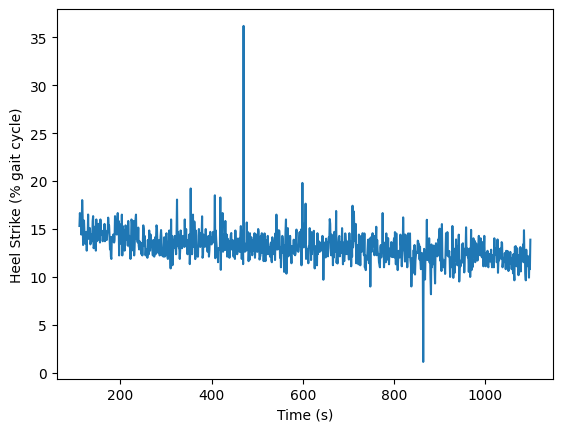

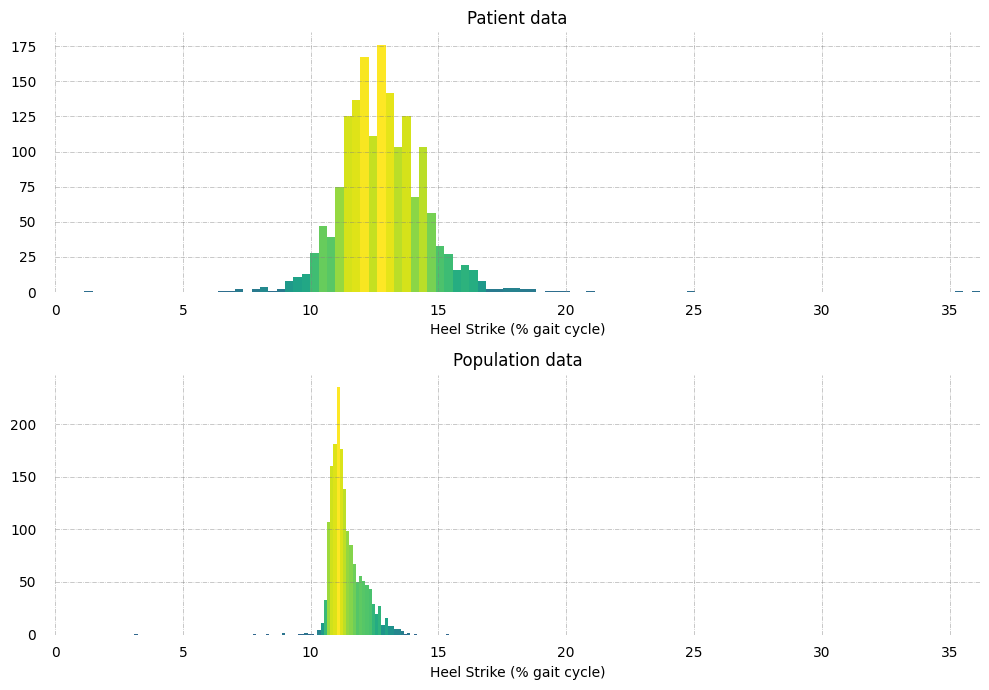

<Figure size 640x480 with 0 Axes>

In [75]:
# EDA - look at test outputs for patient V001
# Add column for time passed
N=1 # patient number
test_outputs[N]['Time (s)']=test_outputs[1]['Stride time (s)'].cumsum()

print(test_outputs[N].head())
sample_1=test_outputs[N][100:1100]


# Plot one parameter
PARAM='Heel Strike (% gait cycle)'
#PARAM='Swing (% gait cycle)'
#PARAM='Cadence (strides/min)'
sample_1[PARAM][10:1000].plot(xlabel='Time (s)', ylabel=PARAM)

# Can apply butterworth filter to clean data


# Plot histogram vs population data
histogram(test_outputs,N, PARAM)

# Store parameters list
PARAMS=test_outputs[N].columns

In [7]:
# First want to detect gait cycles in the data - we will take the raw data and combine this into a matrix
# Matrix of shape []
# Read in calibrated data
import re

directory_path='/content/data/GSTRIDE_database/Test_recordings_calibrated'
test_recordings_cal={}

N_entry=0
# Iterate over all files in the directory
with os.scandir(directory_path) as entries:
    for entry in entries:

        # Check if the entry is a file and ends with .txt
        if entry.is_file() and entry.name.endswith('.txt'):
            N_entry+=1
            # Read the text file as a CSV
            file_path = os.path.join(directory_path, entry.name)
            df = pd.read_csv(file_path, delimiter=r'\s+')  # Assuming the delimiter is a comma
            #Get patient identification number
            patient_number= numbers = int(re.findall(r"[-+]?\d*\.\d+|\d+", str(entry.name))[0])
            #dataframes.append(df)
            test_recordings_cal[patient_number]=df


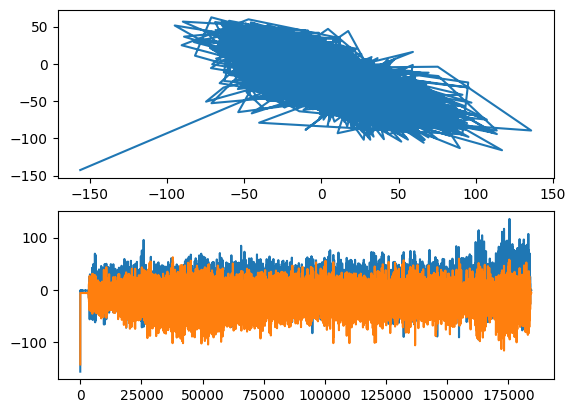

In [8]:
test_recordings_cal[1]

# Examine raw data

#test_recordings_cal[1]['accX[m/s^2]'].plot()
fig,ax = plt.subplots(2,1)
x=test_recordings_cal[1]['accX[m/s^2]']
y=test_recordings_cal[1]['accY[m/s^2]']
ax[0].plot(x,y)
ax[1].plot(x)
ax[1].plot(y)



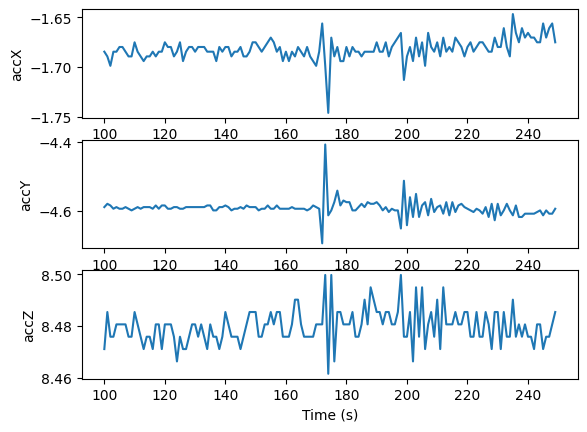

In [9]:
test_recordings_cal[3].head()
# Select samples: 100-200
sample_1=test_recordings_cal[3].iloc[:,0:3][100:250] # select just acceleration data

fig,ax =plt.subplots(len(sample_1.columns),1)

i=0
for sample in sample_1:
  ax[i].plot(sample_1.index, sample_1[sample])
  ax[i].set_xlabel('Time (s)') # Set xlabel using ax.set_xlabel()
  ax[i].set_ylabel(str(sample)[:4]) # Set ylabel using ax.set_ylabel()
  i+=1


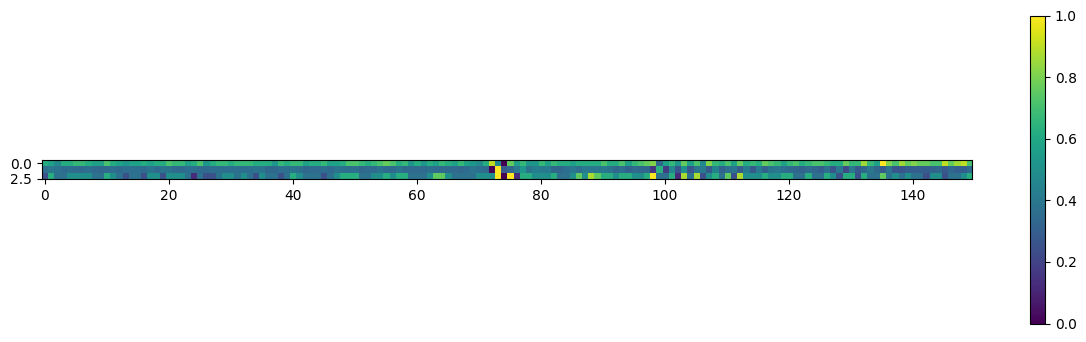

In [10]:
# Preprocess sample data
# Normalise each column - focus on variation
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() # create scaler object

sample_1T=scaler.fit_transform(sample_1) # transformed sample

# Convert the input data into an image
S1T_array=sample_1T.transpose()

# Display this - result
fig, ax = plt.subplots(figsize=(15,4))
im = ax.imshow(S1T_array, cmap='viridis')  # Use 'viridis' or any other suitable colormap
plt.colorbar(im, ax=ax)


In [37]:
# Store image of raw (calibrated) data for each patient
# Average gait cycle time is
import matplotlib.cm as cm

def img_from_data(sample):
  scaler=MinMaxScaler() # create scaler object

  sample=scaler.fit_transform(sample).transpose() # transformed sample

  # 3. Map data to colormap to get RGB values
  # Assuming 'viridis' colormap, you can change it if needed
  norm = plt.Normalize(sample.min(), sample.max())
  image_rgb = cm.viridis(norm(sample))

  # 4. Convert to uint8 and remove alpha channel if present
  image_uint8 = (image_rgb[:, :, :3] * 255).astype(np.uint8)

  return image_uint8  # Return the image as a NumPy array

# Store sample of each patient data as image in dictionary raw_images
n_patients=len(test_recordings_cal)
raw_images={}

for key, value in test_recordings_cal.items():
  for i in range(0,10):
    sample=value.iloc[:,0:3][100+50*i:250+50*i]
    S_array=img_from_data(sample)
    k=str(key)+'-'+str(i)
    #print(k)
    raw_images[k]=S_array
  #fig, ax = plt.subplots()
  #im = ax.imshow(S_array, cmap='viridis')  # Use 'viridis' or any other suitable colormap

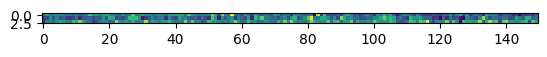

In [38]:

# Check data - last image
fig, ax = plt.subplots()
im = ax.imshow(raw_images[k], cmap='viridis')

In [39]:
#raw_images.keys()

In [40]:
# Sort the dictionary by keys
image_data = dict(sorted(raw_images.items()))

#Store in directoy
from PIL import Image # Import PIL for image saving

# Define directory path to store images
output_dir = 'gait_images'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Save images to directory
for patient_id, image_array in image_data.items():
    image_path = os.path.join(output_dir, f'{patient_id}.png')
    image = Image.fromarray(image_array)  # Create PIL Image object
    image.save(image_path)

print(f"Images saved to directory: {output_dir}")

Images saved to directory: gait_images


In [41]:
# Use CNN to predict patient data metrics based on raw image data
# Get data labels
# Start with stride time
# Get mean stride time for each patient
def get_means(dict):
  means={}
  for key, value in dict.items():
    means[key]=value.mean()
  return means

def get_mean_param(dict,PARAM):
  means={}
  for key, value in dict.items():
    means[key]=value.mean()[PARAM]
  df=pd.DataFrame([means]).transpose().sort_index()
  df.columns=['Mean: '+str(PARAM)]
  return df

mean_dict=get_means(test_outputs)

# Get data
PARAM='Stride time (s)'
sample=3

print(f'Mean {PARAM} is: {mean_dict[sample][PARAM]} for Patient {sample}')


Mean Stride time (s) is: 1.3695607321131447 for Patient 3


array([[<Axes: title={'center': 'Mean: Stride time (s)'}>]], dtype=object)

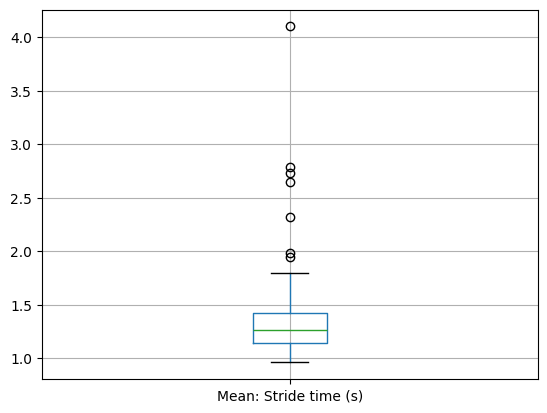

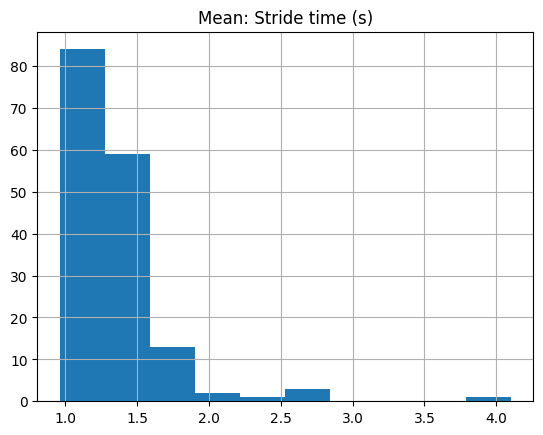

In [42]:
# Get label data - mean stride time
means_df=get_mean_param(test_outputs,PARAM)

# #Visualise the data
means_df.boxplot()
means_df.hist()
#means_df.loc(int(K))

In [43]:
# Match images with labels
labels=pd.DataFrame() # store parameters in df
labels_ID=pd.DataFrame() # Store IDs in df
for key, value in image_data.items():
  #print(key)
  K=key.split('-')[0] # get first part of number
  labels[str(key)+'.png']=means_df.loc[int(K)]
  labels_ID[str(key)+'.png']=pd.DataFrame([K])

labels=labels.transpose()
labels_ID=labels_ID.transpose()
labels_ID.columns=['ID']
list_labels=list(labels.iloc[:,0])


In [44]:
# Now we have matching images with labels
# We will train a CNN with tranfer learning to recognise and predict
# the mean step length given the raw input data from IMU

# Later this will be extended to recognise variability in an individual's gait data stream


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split # Import random_split
from torchvision import transforms, models

In [46]:
# Transform input data for torch
transform=transforms.Compose([
    transforms.ToTensor(), #Convert to Pytorch tensor
    transforms.Resize((224,224)), #Resize to ResNet input size
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #Normalize - using RESNET training parameters
])

In [47]:
# Transform labels_ID to categorical - encoding
num_classes=labels_ID.nunique()[0]+10

# Convert the 'ID' column to numeric before creating the tensor
numbers = torch.tensor([int(x) for x in labels_ID['ID'].tolist()])

# Convert to one-hot encoding
encoded_IDs = F.one_hot(numbers, num_classes=num_classes)  # Assuming 3 unique classes


In [48]:
# Define a custom dataset class (same as before)
# Read in image data from directory and  transform
# Read in labels
class GaitDataset(Dataset):
    def __init__(self, img_dir, labels, labels_ID, transform=None):
        self.img_dir=img_dir
        self.labels = labels
        self.labels_ID = labels_ID
        self.transform = transform
        self.num_classes=self.labels_ID.nunique()[0]+10

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(self.labels.index[idx]))
        image = Image.open(img_path)
        label = self.labels.iloc[idx,0]

        # One hot encoding of identifiers
        # Convert the 'ID' column to numeric before creating the tensor
        numbers = torch.tensor([int(x) for x in self.labels_ID['ID'].tolist()])
        # Convert to one-hot encoding
        encoded_IDs = F.one_hot(numbers, num_classes=self.num_classes)
        label_ID=encoded_IDs[idx]

        #label=self.labels.index[idx]
        if self.transform:
            image = self.transform(image)
        return image, label_ID # Return parameter label or ID label

# Create dataset and dataloader (same as before)
dataset = GaitDataset('/content/gait_images', labels, labels_ID,
                            transform=transform)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=32,  shuffle=True)


In [49]:
# for images,labels in dataloader:
#    print(labels, images.shape)
# #Labels now in batches

In [54]:
# Load a pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer for your task
num_ftrs = model.fc.in_features

# For regression task (predict patient parameters)
#model.fc = nn.Linear(num_ftrs, 1)  # Output layer for regression

# For classification task (predict patient ids)
num_classes = labels_ID.nunique()[0] + 10
model.fc = nn.Linear(num_ftrs, num_classes)  # Output layer for classification

# Split the dataset
train_size = int(0.75 * len(dataset))  # 70% for training
val_size = int(0.15 * len(dataset))  # 10% for validation
test_size = len(dataset) - train_size - val_size   # Remaining 20% for testing
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

#Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=24, shuffle=True)
val_loader=DataLoader(val_dataset, batch_size=24, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)

# Instantiate optimizer and loss function

optimizer = optim.Adam(model.parameters(), lr=0.001)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) - to adapt LR
#criterion = nn.MSELoss() # Mean Squared Error for regression
criterion=nn.CrossEntropyLoss() # Cross Entropy Loss for classification


Epoch [1/10], Loss: 0.2243, Accuracy: 0.02362869121134281, Val accuracy: 0.02531645569620253
Epoch [2/10], Loss: 0.1836, Accuracy: 0.08438818901777267, Val accuracy: 0.03375527426160337
Epoch [3/10], Loss: 0.1519, Accuracy: 0.17637130618095398, Val accuracy: 0.11814345991561181
Epoch [4/10], Loss: 0.1166, Accuracy: 0.3282700479030609, Val accuracy: 0.06329113924050633
Epoch [5/10], Loss: 0.0913, Accuracy: 0.4827004075050354, Val accuracy: 0.2320675105485232
Epoch [6/10], Loss: 0.0610, Accuracy: 0.6607595086097717, Val accuracy: 0.23628691983122363
Epoch [7/10], Loss: 0.0408, Accuracy: 0.799156129360199, Val accuracy: 0.3333333333333333
Epoch [8/10], Loss: 0.0237, Accuracy: 0.8953586220741272, Val accuracy: 0.3670886075949367
Epoch [9/10], Loss: 0.0145, Accuracy: 0.9510548710823059, Val accuracy: 0.32489451476793246
Epoch [10/10], Loss: 0.0071, Accuracy: 0.9848101139068604, Val accuracy: 0.3755274261603376
Training complete


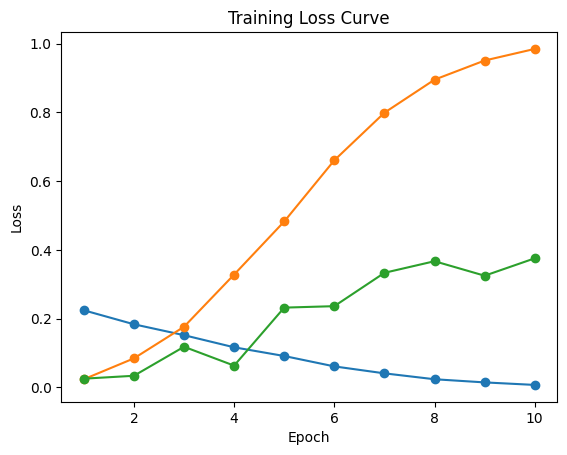

In [55]:
from sklearn.metrics import r2_score

# Training loop
num_epochs = 10
train_losses = []  # Store training losses
train_r2_scores = [] # Store training R2 scores - regression accuracy analysis - REGRESSION
train_accuracies = []  # Store training accuracies - CLASSIFICATION
val_losses = []  # Store validation losses
val_accuracies = []  # Store validation accuracies


for epoch in range(num_epochs):
  model.train()
  running_loss=0
  epoch_r2=0
  correct_predictions = 0 #classification
  total_samples = 0
  num_samples_epoch=0

  for batch_idx, (data, target) in enumerate(train_loader):
      data = data.float() #change data to float

      #Adapt target based on exercise
      #target = torch.tensor(target, dtype=torch.float32) # For regression  - target is float
      target=target.argmax(dim=1).long()  # FOr classification - get class labels


      optimizer.zero_grad() # Zero the gradients
      output = model(data) # Forward pass

      # Calculate loss
      loss = criterion(output, target)
      loss.backward() # Backward pass

      # Update weights
      optimizer.step()
      #scheduler.step() #update learning rate

      # Loss for epoch
      running_loss+=loss.item()
      num_samples_epoch+=data.size(0)

      #Calculate R2 score - for regression - indicates fit of model
      # r2_batch = r2_score(target.cpu().detach().numpy(), output.cpu().detach().numpy()) # convert tensors back to np
      # epoch_r2 += r2_batch * data.size(0)  # Accumulate R2

      # Calculate accuracy - for classification - indicates % of correct predictions
      _, predicted=torch.max(output,1)
      # print(predicted)  # debugging
      # print(target)
      correct_predictions+=(predicted==target).sum()
      total_samples+=target.size(0)

  # Calculate average loss and R2 for the epoch
  epoch_loss = running_loss / num_samples_epoch
  avg_r2_epoch = epoch_r2 / num_samples_epoch # R2
  epoch_accuracy = correct_predictions / total_samples #Accuracy

  train_losses.append(epoch_loss)
  train_r2_scores.append(avg_r2_epoch)
  train_accuracies.append(epoch_accuracy)


  # Validation phase
  model.eval()
  with torch.no_grad():
      val_loss = 0
      val_correct = 0
      val_total = 0
      for data, target in val_loader:
          data = data.float()
          target = target.argmax(dim=1).long()
          output = model(data)
          loss = criterion(output, target)
          val_loss += loss.item() * data.size(0)
          _, predicted = torch.max(output, 1)
          val_correct += (predicted == target).sum().item()
          val_total += target.size(0)

      val_loss /= val_total
      val_accuracy = val_correct / val_total
      val_losses.append(val_loss)
      val_accuracies.append(val_accuracy)

  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy}, Val accuracy: {val_accuracy}')


print("Training complete")
# Plot the loss curve
plt.plot(range(1, num_epochs + 1), train_losses, marker='o')
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


In [56]:
# Evaluate model on test set
model.eval() # set model to eval

# Store predictions and ground truth
predictions=[]
ground_truth=[]

with torch.no_grad():
  for data, target in test_loader:
    data=data.float()
    target=target.argmax(dim=1).long()

    # Make predictions
    output = model(data)

    # Get predicted labels (for classification)
    _, predicted = torch.max(output, 1)

    # Store predictions and labels
    predictions.extend(predicted.cpu().numpy()) # convert back to np
    ground_truth.extend(target.cpu().numpy())


# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ground_truth, predictions)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 0.37341772151898733
